<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/dacon/ConstuctionMachine/ConstuctionMachineOil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pwd

/content


In [3]:
!unzip -uq "/gdrive/MyDrive/data/ConstructionMachineOil/open.zip" -d"/content"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import gc


#csv to parquet

In [5]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [6]:
csv_to_parquet('./train.csv', 'train')
csv_to_parquet('./test.csv', 'test')

train Done.
test Done.


In [7]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

# 데이터 살펴보기

## 데이터정보

In [8]:
info=pd.read_excel('/gdrive/MyDrive/data/ConstructionMachineOil/data_info.xlsx')
info

,Feature Name,Description,단위,비고
0,COMPONENT_ARBITRARY,"샘플 오일 관련 부품 (Component 4종, 비식별화)",NaN,NaN
1,ANONYMOUS_1,무명 Feautre 1. 수치형 데이터,NaN,NaN
2,YEAR,오일 샘플 및 진단 해 (Year),NaN,NaN
3,SAMPLE_TRANSFER_DAY,오일 샘플링 후 진단 기관으로 이동한 기간 (Days),NaN,NaN
4,ANONYMOUS_2,무명 Feautre 2. 수치형 데이터,NaN,NaN
5,AG,원소기호 AG - Silver 함유량,ppm,NaN
6,AL,원소기호 AL - Aluminium 함유량,ppm,NaN
7,B,원소기호 B - Boron 함유량,ppm,NaN
8,BA,원소기호 BA - Barium 함유량,ppm,NaN
9,BE,원소기호 BE - Beryllium 함유량,ppm,NaN


In [9]:
smpl_sub=pd.read_csv('sample_submission.csv')

In [10]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


In [11]:
#숫자
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

##널값확인

In [13]:
#Y Label = target
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [18]:
train.corr()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
ANONYMOUS_1,1.000000,0.106546,-0.041395,0.072154,-0.025674,0.017924,0.013467,-0.064204,-0.010805,-0.015321,...,-0.019708,-0.022825,-0.033298,-0.017366,-0.008237,0.001883,-0.016927,0.019542,-0.019991,0.044197
YEAR,0.106546,1.000000,-0.094086,0.138199,-0.129124,-0.017525,0.011145,-0.098589,-0.063859,0.090465,...,0.008850,-0.010067,-0.022266,0.011152,0.001064,-0.027624,-0.154128,-0.051584,0.048572,-0.087871
SAMPLE_TRANSFER_DAY,-0.041395,-0.094086,1.000000,-0.000060,0.021211,-0.017493,0.004305,0.016909,0.009600,0.008826,...,0.011643,0.020284,0.030461,0.010787,0.012700,-0.002412,0.006226,0.013896,-0.019428,-0.004315
ANONYMOUS_2,0.072154,0.138199,-0.000060,1.000000,-0.006266,-0.022788,-0.100307,-0.011871,0.011162,-0.043046,...,-0.001921,-0.005246,-0.009702,-0.016891,-0.012842,-0.006469,-0.044917,-0.025339,0.032758,-0.033641
AG,-0.025674,-0.129124,0.021211,-0.006266,1.000000,0.019600,-0.028131,0.031649,0.020884,-0.004489,...,0.008361,0.006323,-0.010215,-0.008110,-0.002812,-0.003853,0.024616,0.013592,0.002631,0.014671
AL,0.017924,-0.017525,-0.017493,-0.022788,0.019600,1.000000,0.000037,0.240863,-0.000858,-0.070322,...,-0.007348,-0.007812,-0.003405,-0.007312,-0.015504,0.026213,0.016754,0.013823,-0.024873,0.370512
B,0.013467,0.011145,0.004305,-0.100307,-0.028131,0.000037,1.000000,-0.045454,-0.013252,0.356121,...,-0.003079,-0.000280,0.010742,0.025136,0.014559,0.018197,0.041301,-0.000882,-0.006463,-0.029787
BA,-0.064204,-0.098589,0.016909,-0.011871,0.031649,0.240863,-0.045454,1.000000,0.029900,-0.008642,...,0.007547,0.013480,0.005625,-0.013144,-0.008746,0.000480,0.029214,0.004150,-0.009574,0.104840
BE,-0.010805,-0.063859,0.009600,0.011162,0.020884,-0.000858,-0.013252,0.029900,1.000000,0.006735,...,-0.014197,-0.014516,-0.012651,-0.004631,0.014112,0.000482,-0.021376,0.001359,0.012394,0.010685
CA,-0.015321,0.090465,0.008826,-0.043046,-0.004489,-0.070322,0.356121,-0.008642,0.006735,1.000000,...,-0.013280,-0.003550,0.011510,-0.006454,0.009428,-0.014419,-0.011466,-0.059102,0.110625,-0.150379


In [15]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [184]:
train.isna().sum()/len(train)

ID                     0.000000
COMPONENT_ARBITRARY    0.000000
ANONYMOUS_1            0.000000
YEAR                   0.000000
SAMPLE_TRANSFER_DAY    0.000000
ANONYMOUS_2            0.000000
AG                     0.000000
AL                     0.000000
B                      0.000000
BA                     0.000000
BE                     0.000000
CA                     0.000000
CD                     0.098900
CO                     0.000000
CR                     0.000000
CU                     0.000000
FE                     0.000000
H2O                    0.000000
K                      0.163107
LI                     0.000000
MG                     0.000000
MN                     0.000000
MO                     0.000000
NA                     0.000000
NI                     0.000000
P                      0.000000
PB                     0.000000
PQINDEX                0.000000
S                      0.000000
SB                     0.000000
SI                     0.000000
SN      

In [138]:
##결측치 비율이 20%가 넘는 column 확인 후 제거
[train.isna().sum()/len(train)>0.20]

[ID                     False
 COMPONENT_ARBITRARY    False
 ANONYMOUS_1            False
 YEAR                   False
 SAMPLE_TRANSFER_DAY    False
 ANONYMOUS_2            False
 AG                     False
 AL                     False
 B                      False
 BA                     False
 BE                     False
 CA                     False
 CD                     False
 CO                     False
 CR                     False
 CU                     False
 FH2O                    True
 FNOX                    True
 FOPTIMETHGLY            True
 FOXID                   True
 FSO4                    True
 FTBN                    True
 FE                     False
 FUEL                    True
 H2O                    False
 K                      False
 LI                     False
 MG                     False
 MN                     False
 MO                     False
 NA                     False
 NI                     False
 P                      False
 PB       

In [139]:
#컬럼확인
train.columns[[train.isna().sum()/len(train)>0.20]]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL',
       'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4',
       'V100'],
      dtype='object')

In [183]:
#결측치 비율 많은 column 드랍
train=train.drop(columns = train.columns[train.isna().sum()/len(train) > 0.20], axis = 1)

In [152]:
#54개 컬럼 -> 37개 컬럼
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0


In [14]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

In [31]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [33]:
print(train.columns)

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')


## 칼럼정의

In [159]:
categorical_featrues=['ID','COMPONENT_ARBITRARY','YEAR','Y_LABEL']
numerical_features=[
    i 
    for i in train.columns 
    if i not in categorical_featrues
    ]

## 시각화

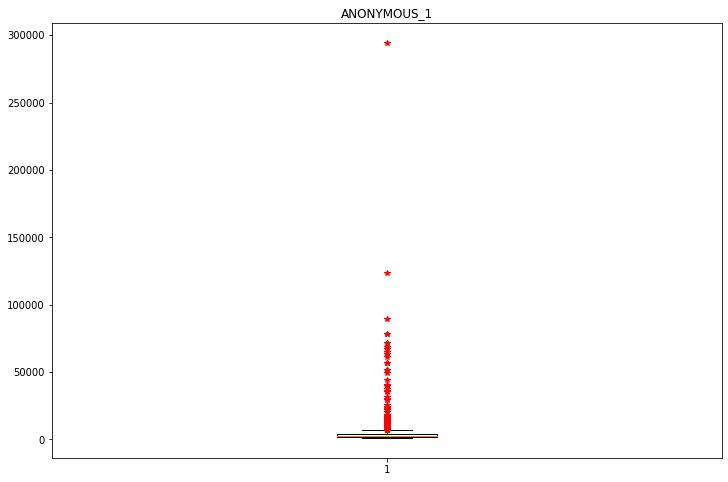

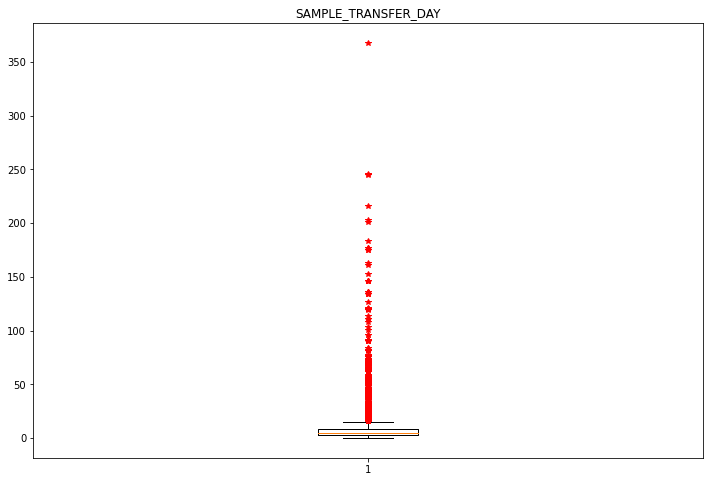

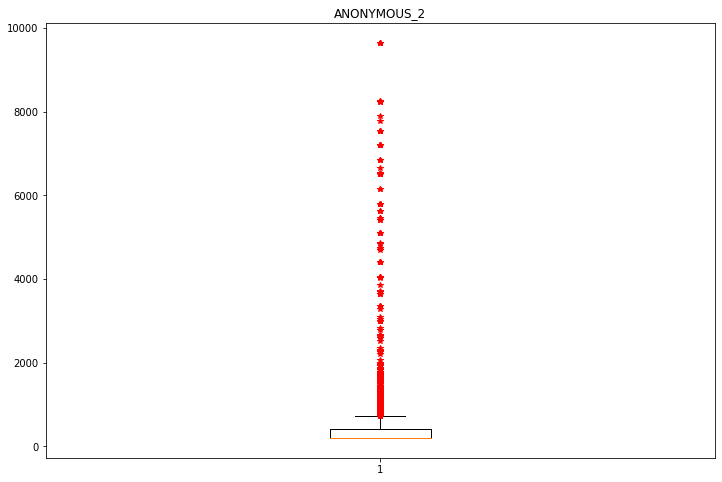

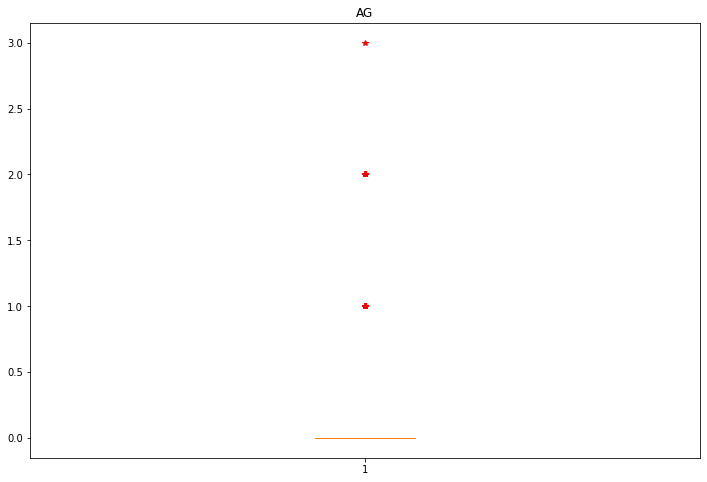

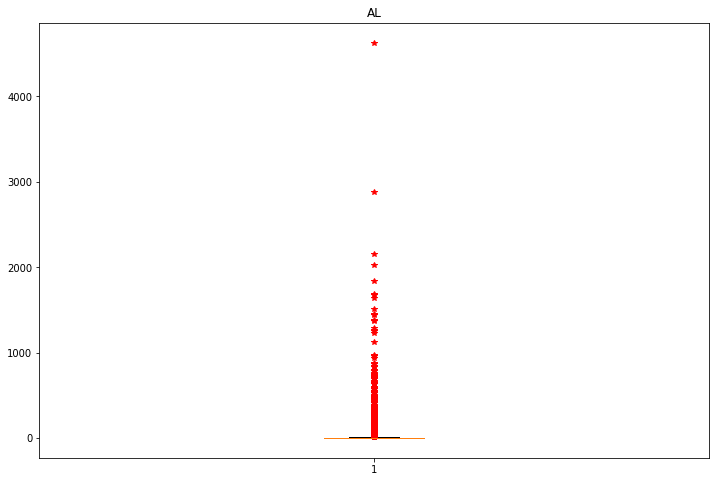

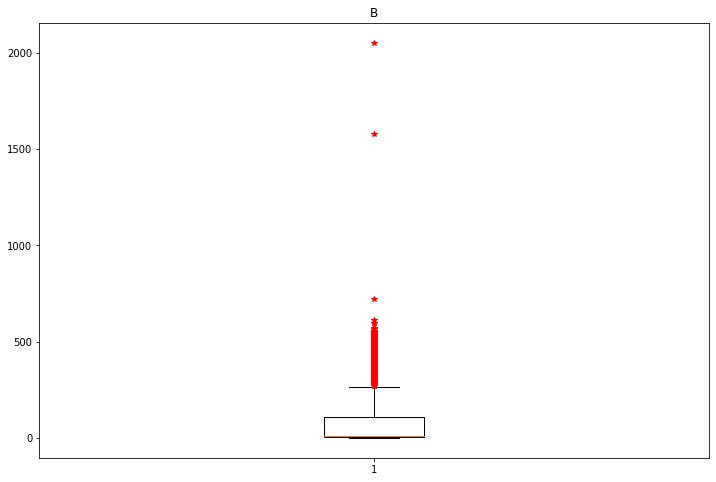

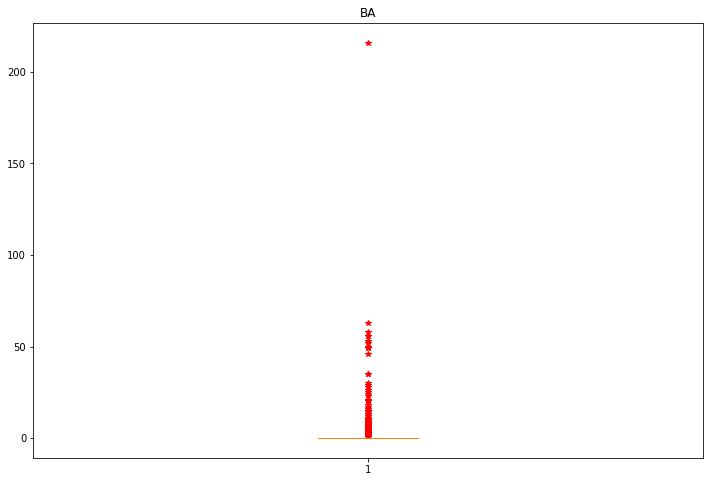

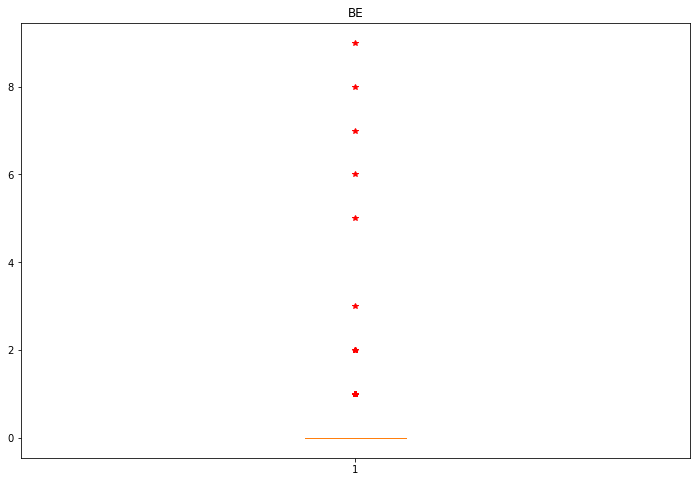

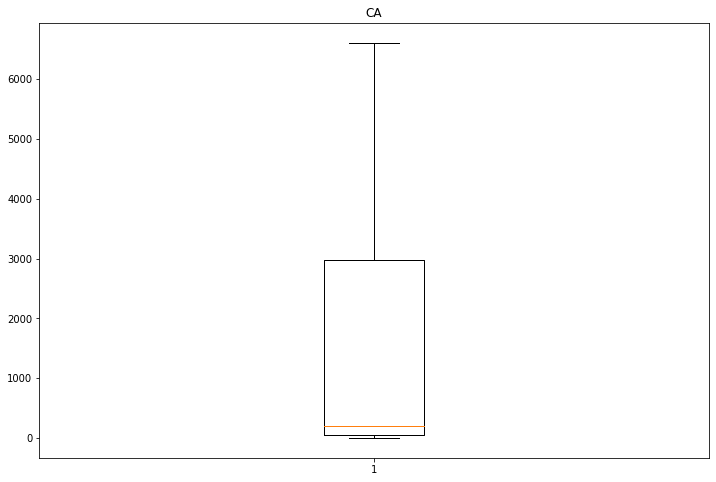

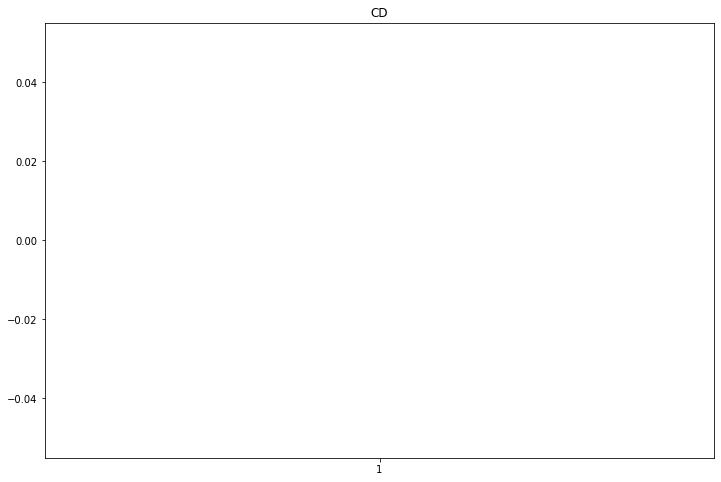

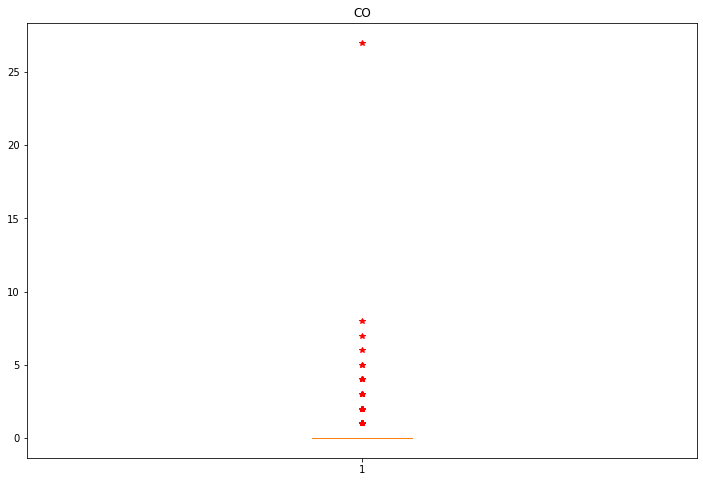

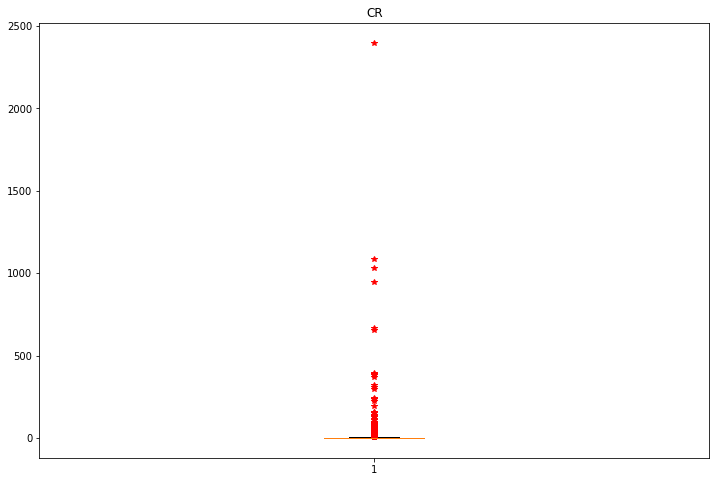

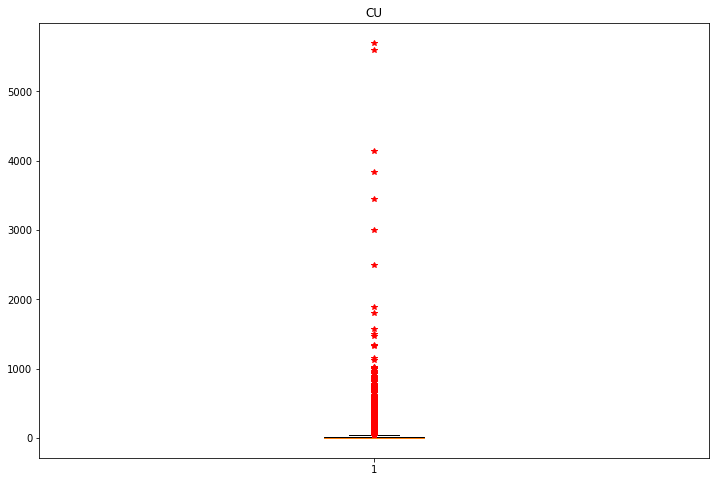

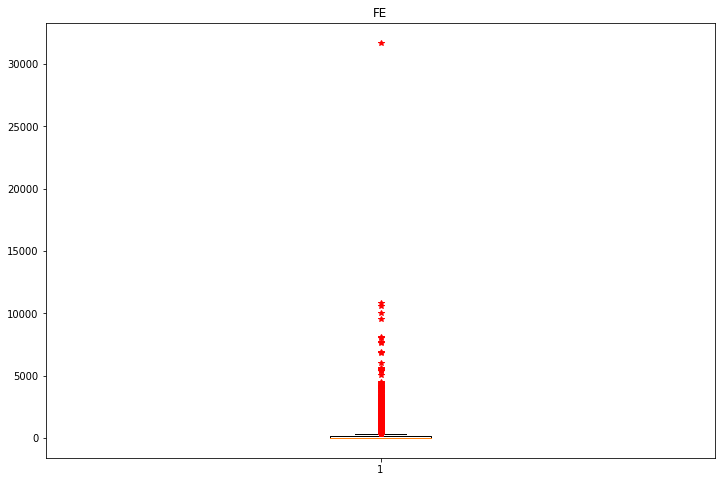

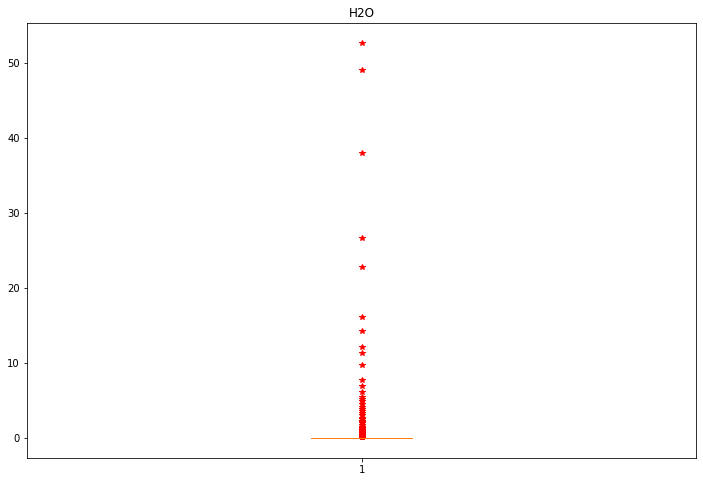

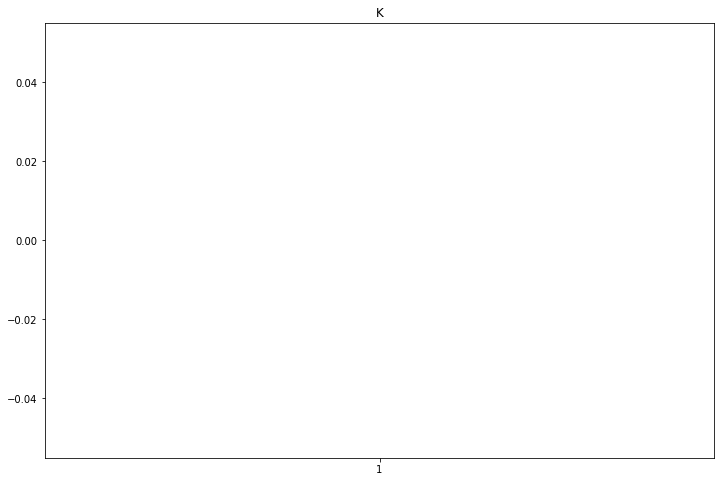

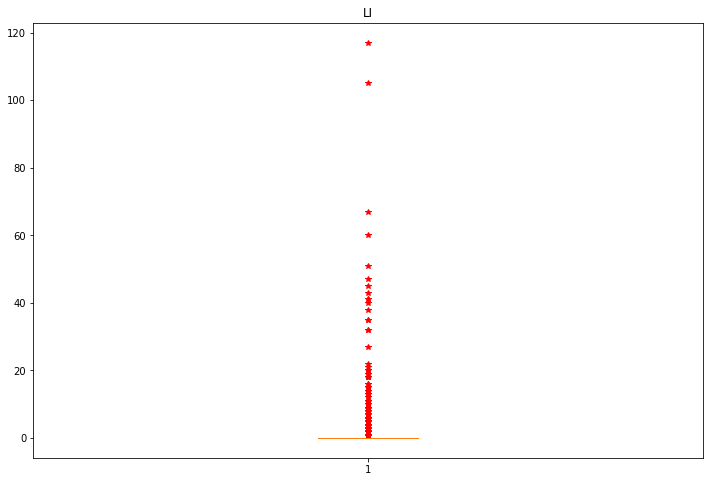

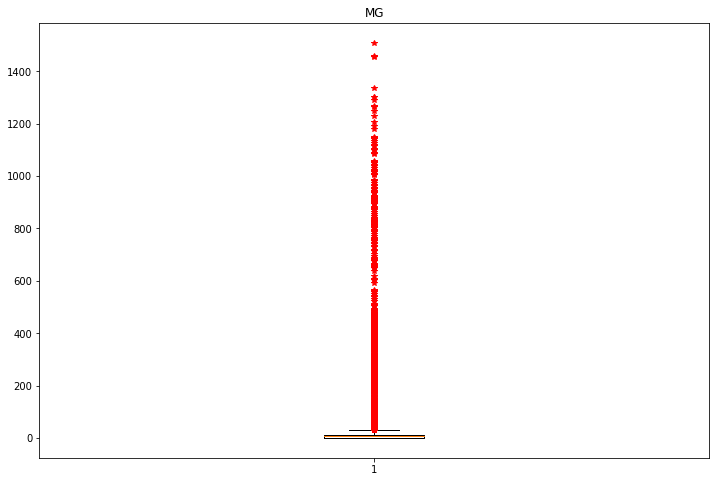

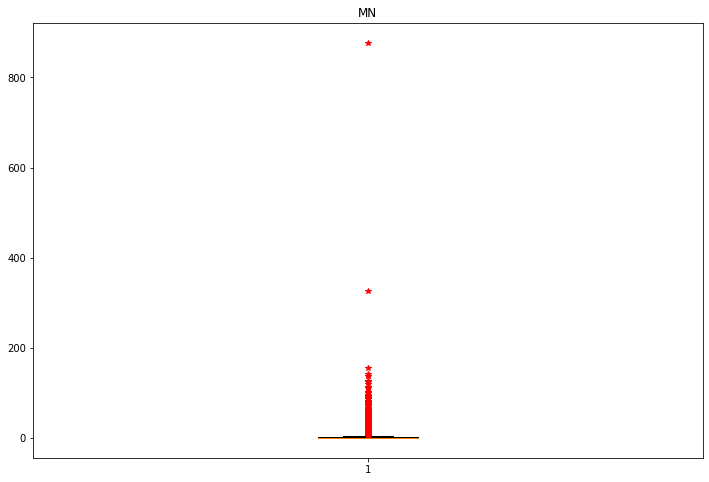

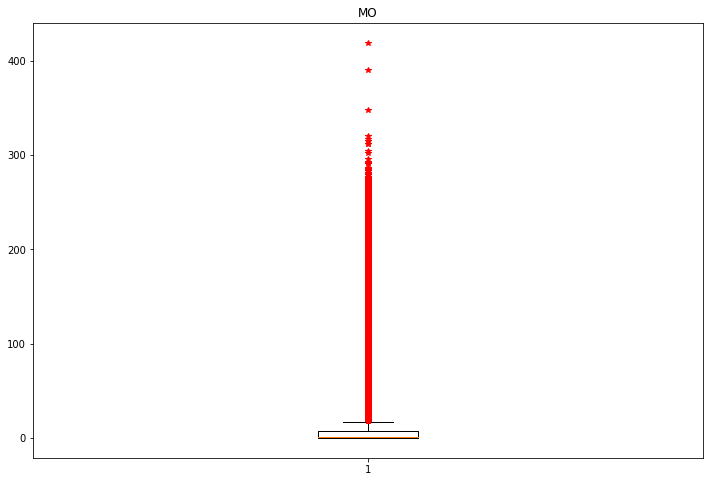

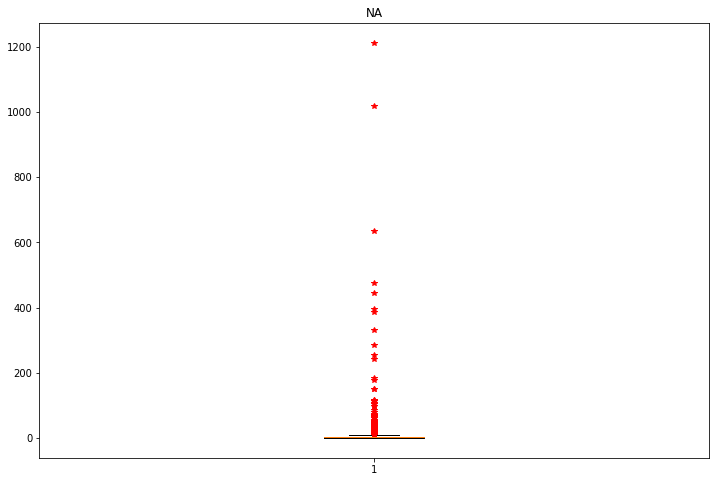

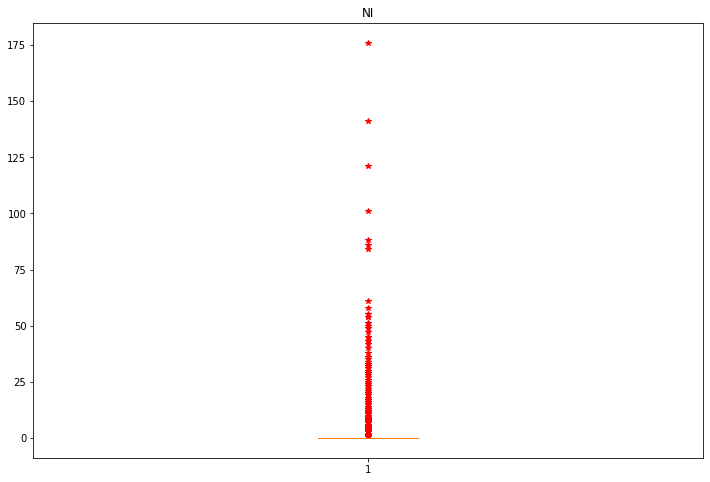

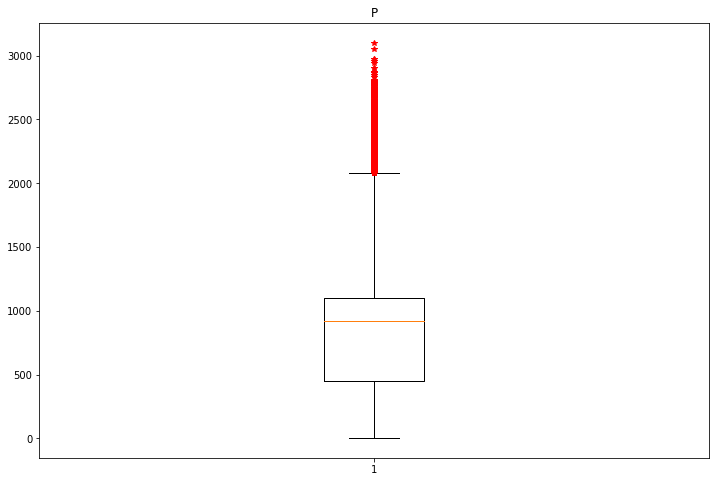

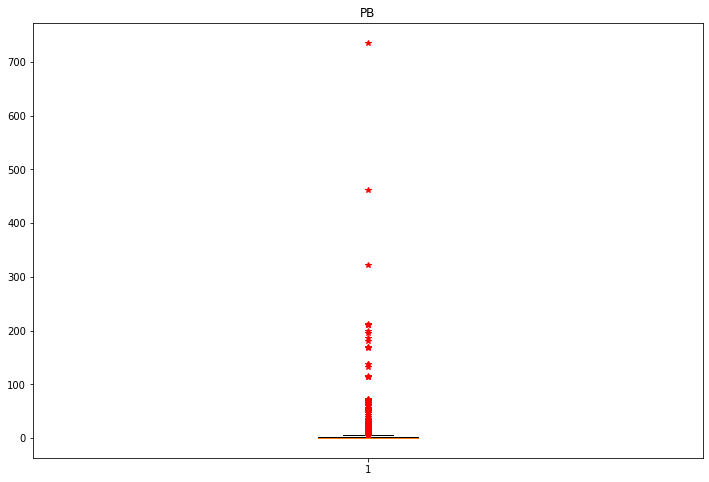

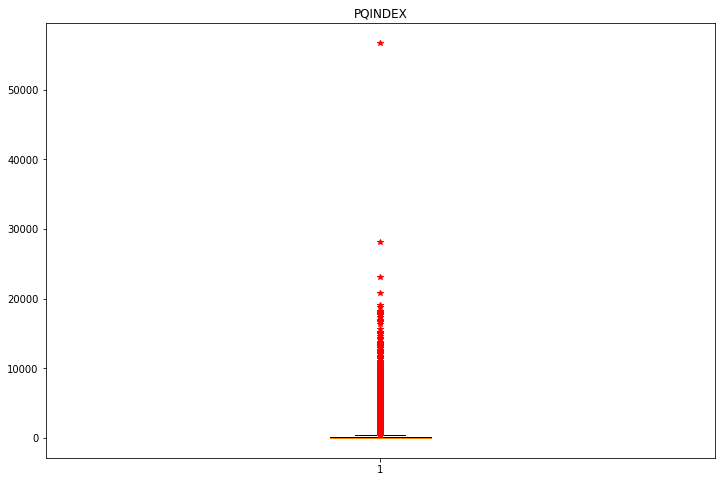

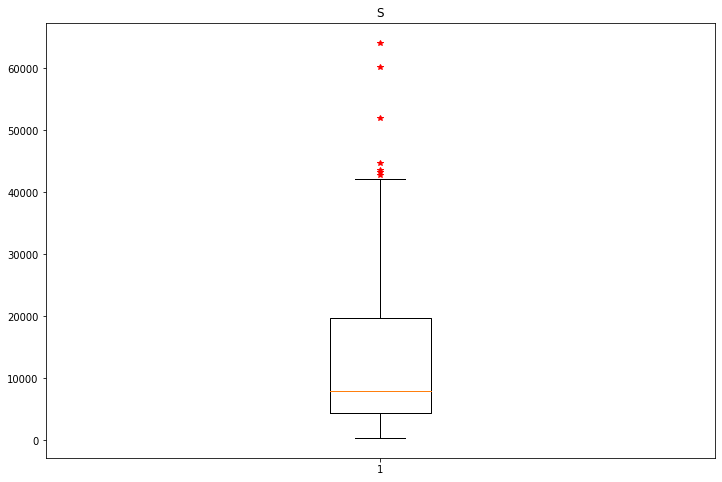

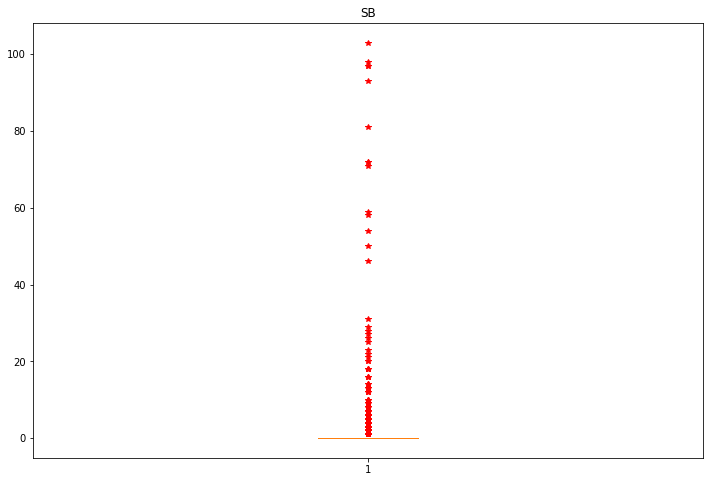

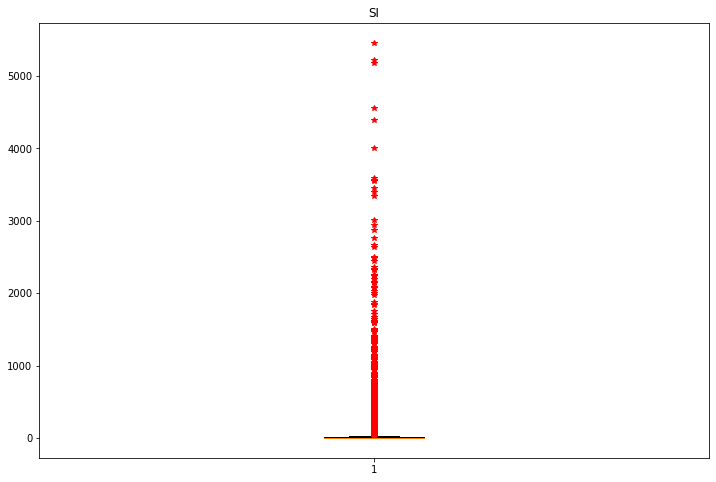

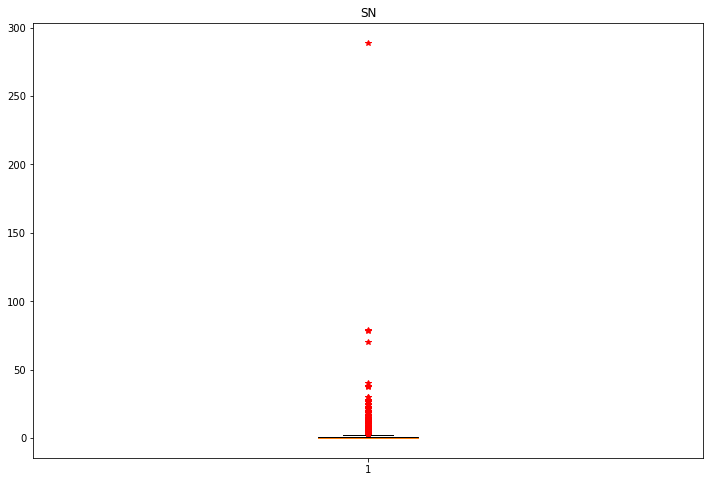

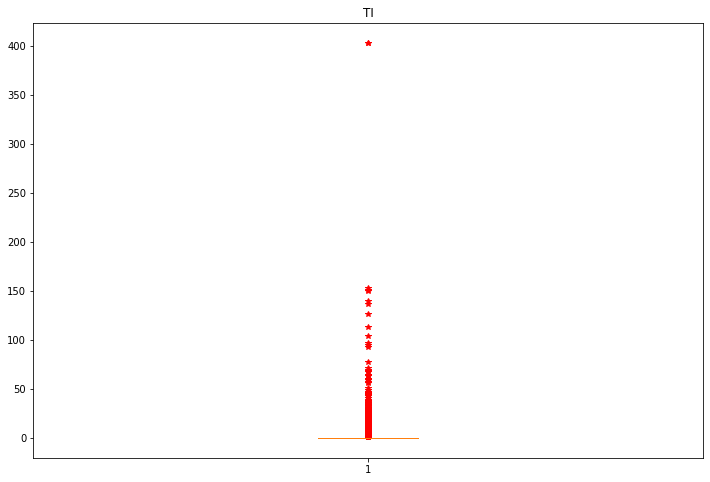

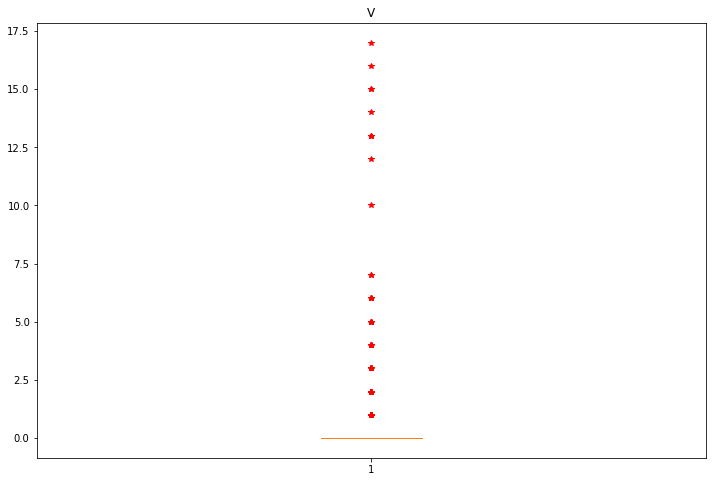

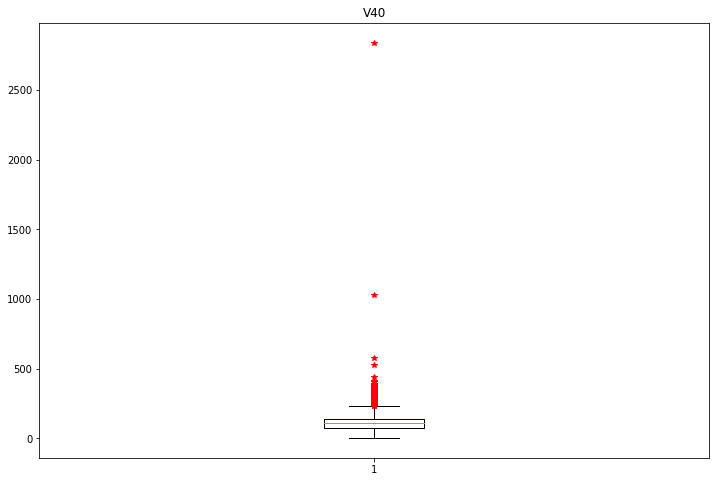

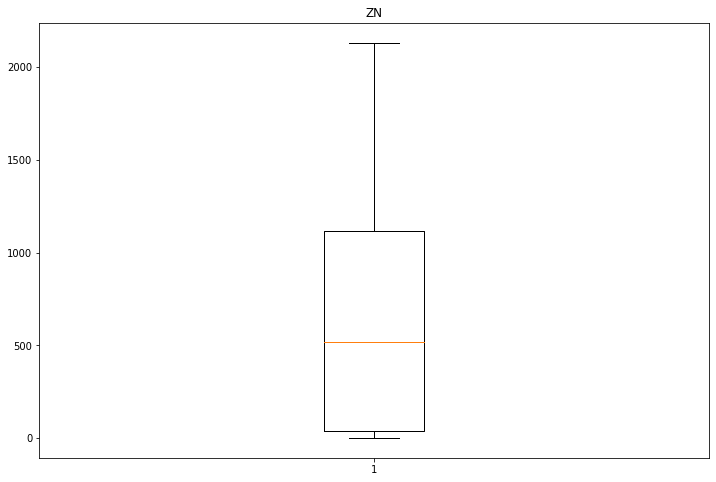

In [166]:
for col in numerical_features :
  plt.figure(figsize=(12,8))
  plt.boxplot(train[col], sym='r*')
  plt.title(col)
  plt.show()



- Y_LABEL 시각화

In [ ]:
train.Y_LABEL.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbaf7e62130>,
 [Text(-0.2914249600082275, -1.060693873218943, '0'),
  Text(0.29142503449022283, 1.06069385275506, '1')],
 [Text(-0.1589590690953968, -0.5785602944830598, '91.47%'),
  Text(0.1589591097219397, 0.5785602833209417, '8.53%')])

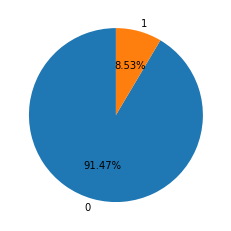

In [175]:
#Y_LABEL
plt.pie(train['Y_LABEL'].value_counts(), labels=train['Y_LABEL'].value_counts().index,  autopct="%.2f%%", startangle = 90)


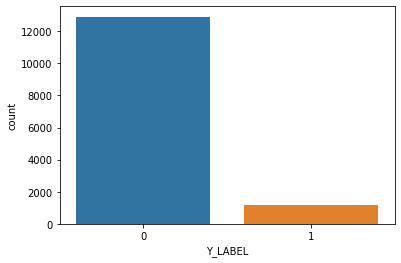

In [176]:
sns.countplot(data=train, x='Y_LABEL')

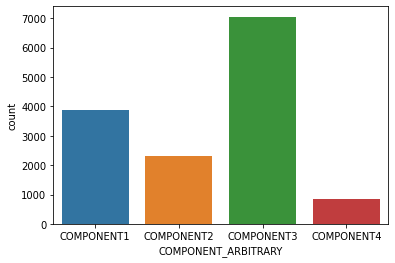

In [ ]:
#COMPONENT_ARBITRARY
sns.countplot(data=train, x='COMPONENT_ARBITRARY', order= ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

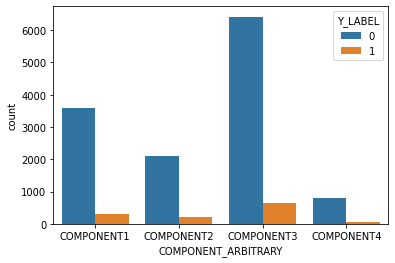

In [ ]:
sns.countplot(data=train, x='COMPONENT_ARBITRARY',hue='Y_LABEL',order= ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

## 유사성

decribe()함수

count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

In [185]:
##mean과 50%가 크게 차이나면 이상치가 다수 존재할것으로 예상

## 데이터가 너무 많기 때문에 숫자로 보는것이 어려움
train.describe().round(4)

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
count,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,...,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000,14095.0000
mean,3146.0829,2013.6525,7.6006,387.4169,0.0258,12.7077,64.0262,0.6928,0.0063,1366.7576,...,415.1596,12029.3186,0.4770,35.0582,0.9098,0.7079,0.0507,109.3558,588.6468,0.0853
std,4216.0898,3.9648,11.6816,550.0161,0.1719,86.9680,102.8769,2.9055,0.1522,1481.9247,...,1528.1910,9325.6102,2.7299,195.3290,3.6043,6.8976,0.4754,49.6124,531.7434,0.2794
min,1000.0000,2007.0000,0.0000,200.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,386.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.9000,0.0000,0.0000
25%,1655.0000,2010.0000,3.0000,200.0000,0.0000,1.0000,3.0000,0.0000,0.0000,48.0000,...,12.0000,4440.5000,0.0000,3.0000,0.0000,0.0000,0.0000,71.8000,37.0000,0.0000
50%,2227.0000,2014.0000,5.0000,200.0000,0.0000,2.0000,11.0000,0.0000,0.0000,198.0000,...,29.0000,8034.0000,0.0000,6.0000,0.0000,0.0000,0.0000,111.3000,520.0000,0.0000
75%,3797.0000,2017.0000,8.0000,410.0000,0.0000,4.0000,110.0000,0.0000,0.0000,2975.0000,...,181.0000,19750.0000,0.0000,12.0000,1.0000,0.0000,0.0000,137.2000,1119.0000,0.0000
max,294451.0000,2022.0000,368.0000,9650.0000,3.0000,4630.0000,2051.0000,216.0000,9.0000,6609.0000,...,56761.0000,64160.0000,103.0000,5459.0000,289.0000,403.0000,17.0000,2840.5000,2132.0000,1.0000


In [179]:
train_corr=train
train_corr=train_corr.astype({'Y_LABEL':'int'})
corr=train_corr.corr(method='pearson')

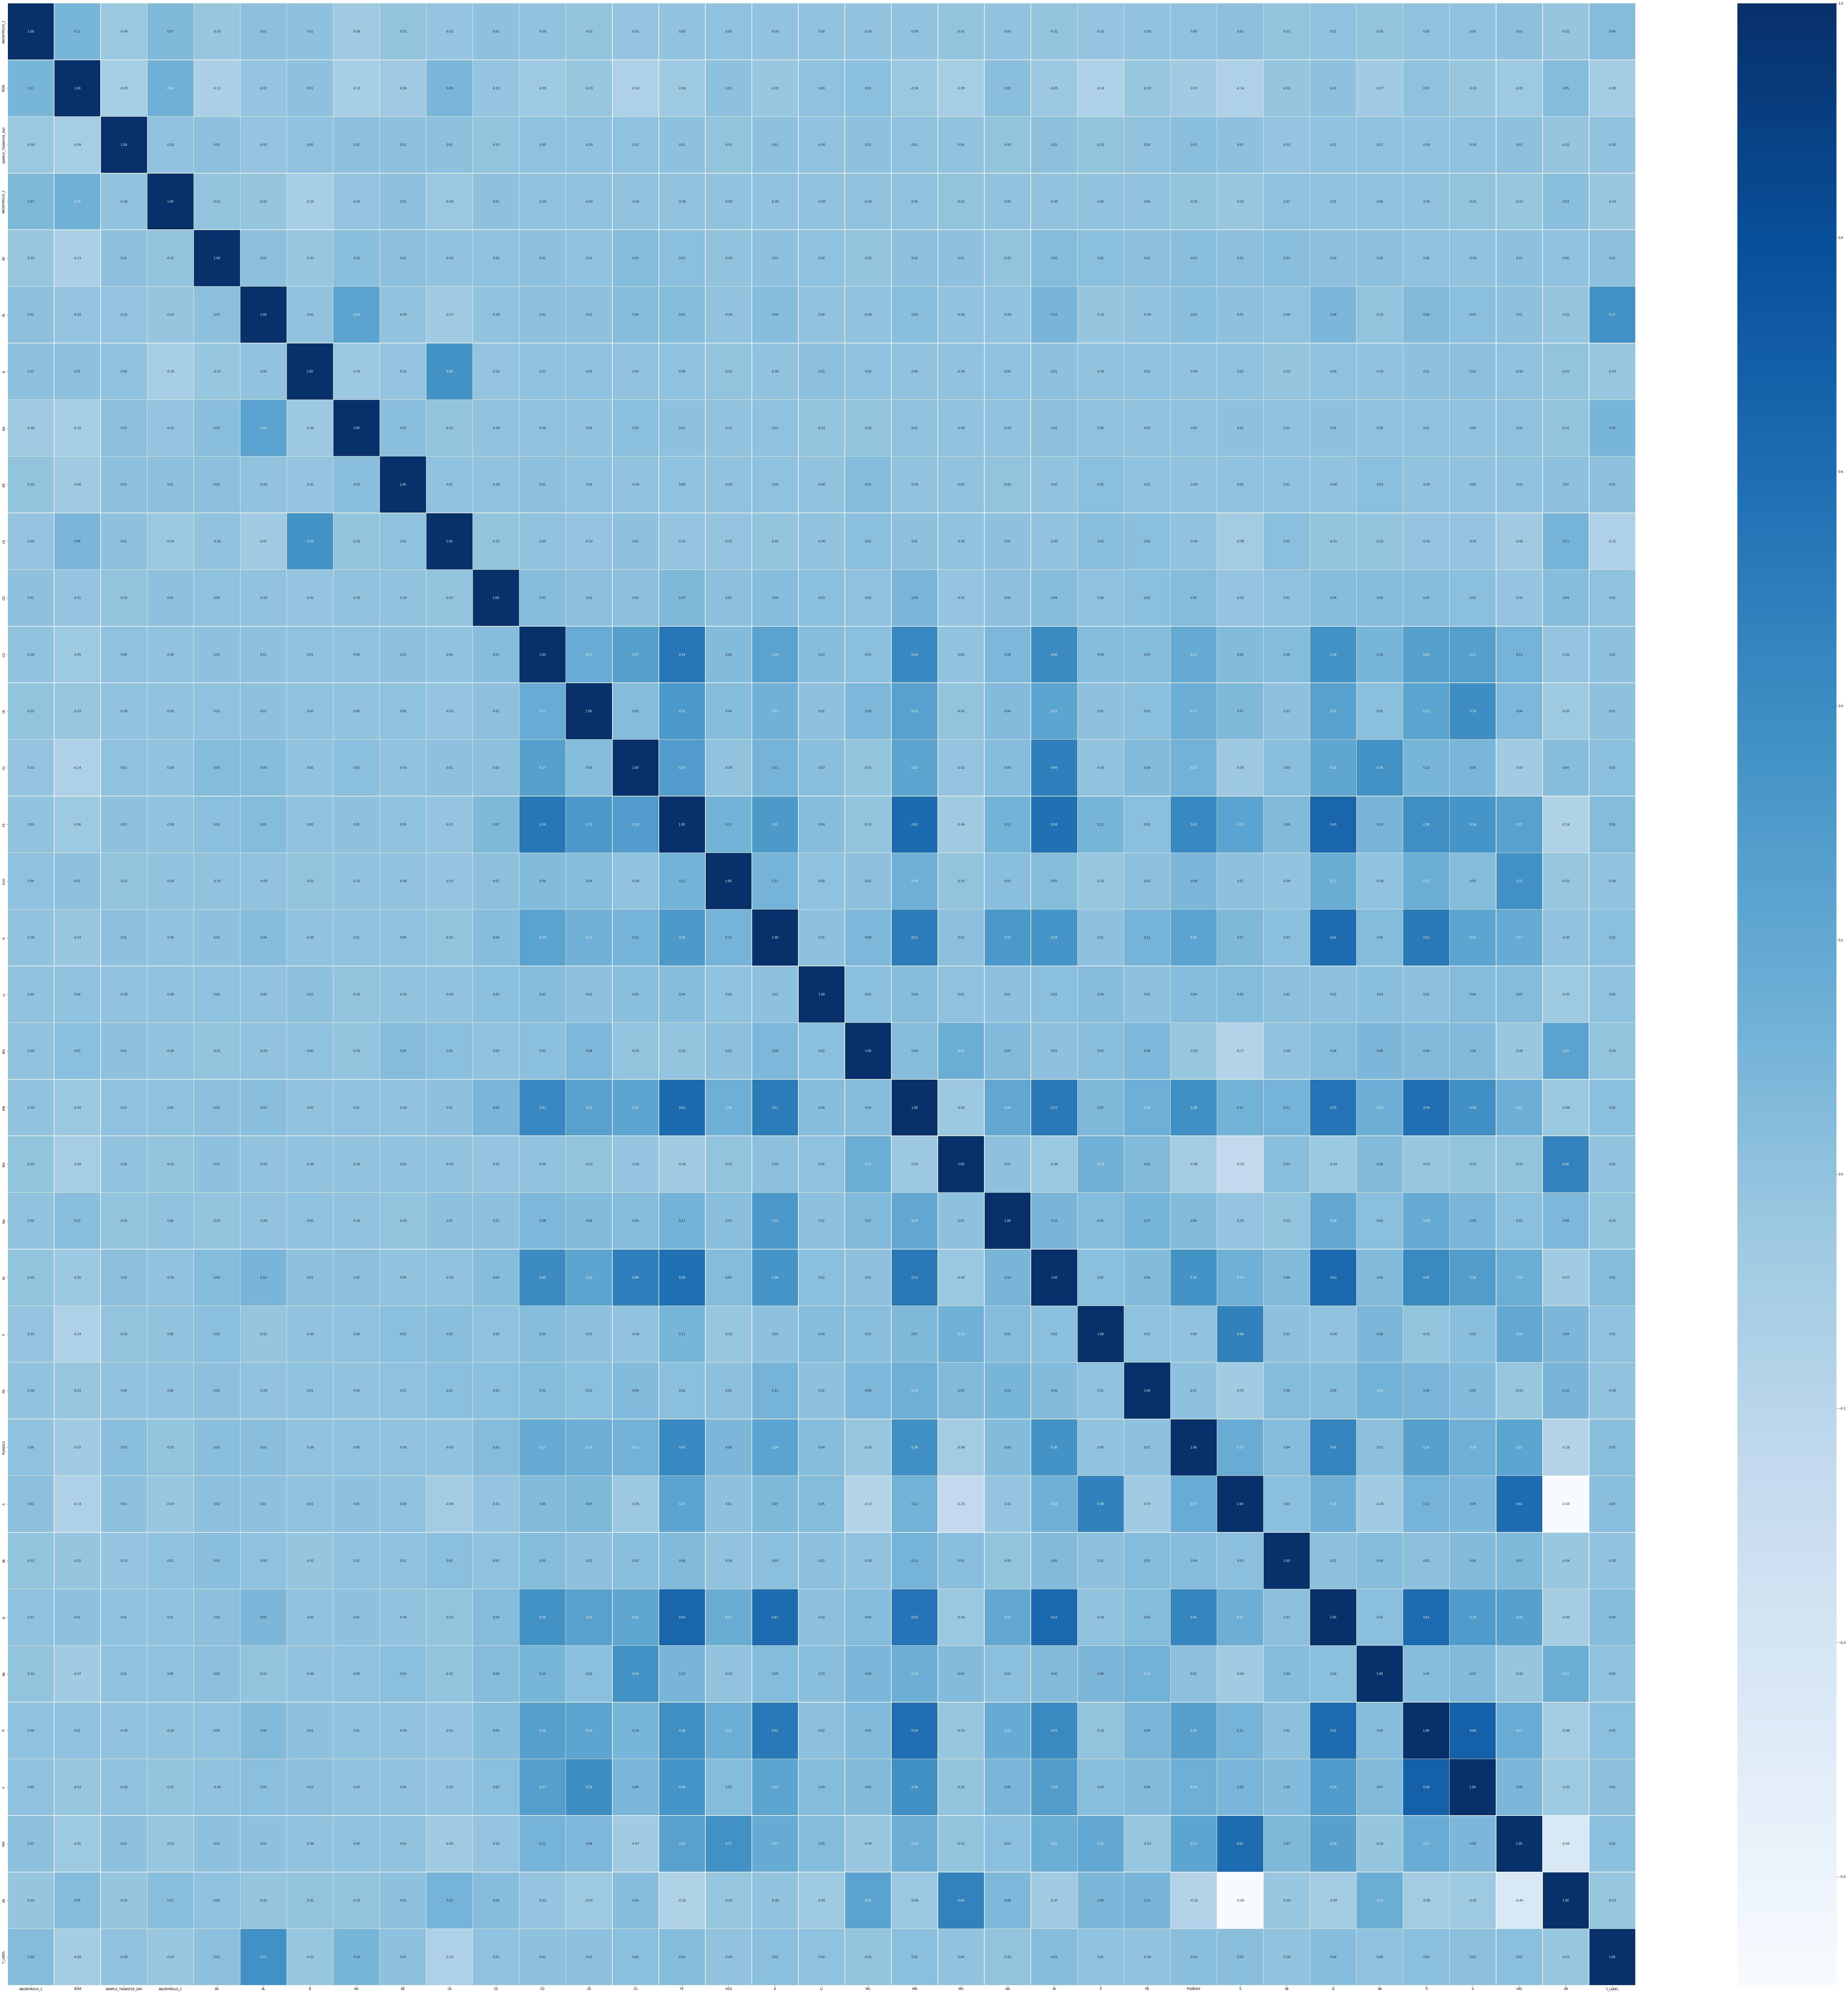

In [180]:
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [182]:
# #컬럼수가 많아서 target과 상관도가 높은 순서대로 출력해봄

# 데이터프레임으로 표현하기
# correlation = corr.unstack()
# train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
# train_temp.style.background_gradient(cmap='viridis')
corr_mat=train.corr()
corr_mat['Y_LABEL'].sort_values(ascending=False)

Y_LABEL                1.000000
AL                     0.370512
BA                     0.104840
FE                     0.047992
NI                     0.046806
ANONYMOUS_1            0.044197
SI                     0.036731
PQINDEX                0.028966
S                      0.027923
TI                     0.025637
CU                     0.024975
MN                     0.024274
K                      0.023963
V40                    0.023195
V                      0.020862
AG                     0.014671
CR                     0.014233
BE                     0.010685
CO                     0.008175
P                      0.007602
CD                     0.005241
LI                     0.002921
SN                     0.002359
MO                     0.001206
SB                    -0.002028
PB                    -0.003549
H2O                   -0.004262
SAMPLE_TRANSFER_DAY   -0.004315
MG                    -0.008807
NA                    -0.010820
ZN                    -0.027551
B       

- 정상치와 이상치의 비율이 지나치게 Imbalance하다.
- 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
- 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
- train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.

--> 즉 실질적으로 데이터를 건들고 수정하기보다는 모델선정과 일반화(?)에 집중해야할것으로 보임

##데이터정리

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)

원핫인코딩 COMPONENT_ARBITRARY</br>
test drop </br>
SAMPLE_TRANSFER_DAY
AL
B
BA
BE
CA
CD
FH2O
FNOX
FOPTIMETHGLY
FOXID
FSO4
FTBN
FUEL
K
LI
MG
NA
P
PB
S
SB
SI
SN
SOOTPERCENTAGE
U100
U75
U50
U25
U20
U14
U6
U4
V100
Y_LABEL

#모델링

In [ ]:
# 1. 부스팅 트리 계열의 predict_proba 이용 (Knowledge Distillation)
# 2. 결과 확인 후 딥러닝 모델 추가로 이용
# 3. 이상치 제거 후 비교
# 4. 컬럼 제거 후 비교